# **Exploring E-commerce Trends**

Exploring E-commerce Trends: A Guide to Leveraging Dummy Dataset
In the world of e-commerce, data is a powerful asset that can be leveraged to understand customer behavior, improve sales strategies, and enhance overall business performance. This guide explores how to effectively utilize a dummy dataset generated to simulate various aspects of an e-commerce platform. By analyzing this dataset, businesses can gain valuable insights into product trends, customer preferences, and market dynamics.

This dataset contains detailed information on this dummy transaction. It includes the following attributes:
*   ProductID: product id
*   ProductName: name of product
*   Category: category
*   Price: price
*   Rating: ratings
*   NumReviews: number of reviews
*   StockQuantity: stock quantity
*   Discount: discount of product in percent
*   Sales: number of sales
*   DateAdded: date added

### importing library and data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [5]:
df = pd.read_csv("/content/ecommerce_product_dataset.csv")

In [6]:
df.head(5)

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08


### Checking Dataset

In [7]:
print(df.columns)
print(df.shape)

Index(['ProductID', 'ProductName', 'Category', 'Price', 'Rating', 'NumReviews',
       'StockQuantity', 'Discount', 'Sales', 'DateAdded'],
      dtype='object')
(1000, 10)


In [8]:
print(df.info)

<bound method DataFrame.info of      ProductID       ProductName     Category   Price  Rating  NumReviews  \
0            1        Headphones  Electronics  400.31     1.7        3772   
1            2        Headphones  Electronics  235.03     2.3        2919   
2            3        Smartwatch  Electronics  417.90     1.8        1184   
3            4        Smartphone  Electronics  152.70     3.4        2047   
4            5            Laptop  Electronics  394.74     1.8        1267   
..         ...               ...          ...     ...     ...         ...   
995        996     Throw Blanket     Blankets  207.72     2.3        1973   
996        997    Fleece Blanket     Blankets  268.60     3.2         841   
997        998     Throw Blanket     Blankets   92.74     2.8        3454   
998        999  Weighted Blanket     Blankets  152.28     1.3        2850   
999       1000     Throw Blanket     Blankets  136.53     2.0        4055   

     StockQuantity  Discount  Sales   DateA

In [9]:
print(df.describe)

<bound method NDFrame.describe of      ProductID       ProductName     Category   Price  Rating  NumReviews  \
0            1        Headphones  Electronics  400.31     1.7        3772   
1            2        Headphones  Electronics  235.03     2.3        2919   
2            3        Smartwatch  Electronics  417.90     1.8        1184   
3            4        Smartphone  Electronics  152.70     3.4        2047   
4            5            Laptop  Electronics  394.74     1.8        1267   
..         ...               ...          ...     ...     ...         ...   
995        996     Throw Blanket     Blankets  207.72     2.3        1973   
996        997    Fleece Blanket     Blankets  268.60     3.2         841   
997        998     Throw Blanket     Blankets   92.74     2.8        3454   
998        999  Weighted Blanket     Blankets  152.28     1.3        2850   
999       1000     Throw Blanket     Blankets  136.53     2.0        4055   

     StockQuantity  Discount  Sales   Dat

### Data Cleansing

In [10]:
# Checking missing values
df.isna().sum()

ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
dtype: int64

In [11]:
# checking missing val
df.isnull().sum()

ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
dtype: int64

### Checking Column Dtypes

In [12]:
import pandas.api.types as ptypes

def check_columns(df, kolom):
  if kolom not in df.columns:
    return f"this column {kolom} is not found"

  if ptypes.is_numeric_dtype(df[kolom]):
    return f"this column {kolom} dtype is numeric"
  elif ptypes.is_string_dtype(df[kolom]):
    return f"this column {kolom} dtype is string"
  else:
    return f"this column {kolom} has another dtype"

In [13]:
print(check_columns(df, 'ProductID'))
print(check_columns(df, 'ProductName'))
print(check_columns(df, 'Category'))
print(check_columns(df, 'Price'))
print(check_columns(df, 'Rating'))
print(check_columns(df, 'NumReviews'))
print(check_columns(df, 'StockQuantity'))
print(check_columns(df, 'Discount'))
print(check_columns(df, 'Sales'))
print(check_columns(df, 'DateAdded'))

this column ProductID dtype is numeric
this column ProductName dtype is string
this column Category dtype is string
this column Price dtype is numeric
this column Rating dtype is numeric
this column NumReviews dtype is numeric
this column StockQuantity dtype is numeric
this column Discount dtype is numeric
this column Sales dtype is numeric
this column DateAdded dtype is string


In [14]:
# Changing product id and rating dtype to string
df['ProductID'] = df['ProductID'].astype(str)
df['Rating'] = df['Rating'].astype(str)

In [15]:
categorical_columns = df[['ProductID','ProductName','Category','Rating']]

In [16]:
categorical_columns.head()

,ProductID,ProductName,Category,Rating
0,1,Headphones,Electronics,1.7
1,2,Headphones,Electronics,2.3
2,3,Smartwatch,Electronics,1.8
3,4,Smartphone,Electronics,3.4
4,5,Laptop,Electronics,1.8


In [17]:
numerical_columns = df[['Price','NumReviews','StockQuantity','Discount','Sales']]

In [18]:
numerical_columns.head()

,Price,NumReviews,StockQuantity,Discount,Sales
0,400.31,3772,20,0.08,466
1,235.03,2919,663,0.33,1332
2,417.90,1184,459,0.31,252
3,152.70,2047,475,0.49,1806
4,394.74,1267,831,0.23,1508


## Preparation Analysis

In [21]:
# Creating Profit column from (price - (price*discount)) * sales
df['Profit'] = round((df['Price'] - (df['Price']* df['Discount'])) * df['Sales'],2)

In [22]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,Profit
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08,171620.90
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26,209750.17
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18,72664.45
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03,140645.86
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08,458356.30


In [25]:
#Correlation between Price and Profit
correlation = df['Price'].corr(df['Profit'])
print(f"Correlation between {'Price'} and {'Profit'}: {correlation}")

#Correlation between Price and Profit
correlation = df['Sales'].corr(df['Profit'])
print(f"Correlation between {'Sales'} and {'Profit'}: {correlation}")

#Correlation between Price and Profit
correlation = df['Discount'].corr(df['Profit'])
print(f"Correlation between {'Discount'} and {'Profit'}: {correlation}")

#Correlation between Sales and Price
correlation = df['Sales'].corr(df['Price'])
print(f"Correlation between {'Sales'} and {'Price'}: {correlation}")

#Correlation between Price and NumReviews
correlation = df['Price'].corr(df['NumReviews'])
print(f"Correlation between {'Price'} and {'NumReviews'}: {correlation}")

#Correlation between StockQuantity and discount
correlation = df['StockQuantity'].corr(df['Discount'])
print(f"Correlation between {'StockQuantity'} and {'Discount'}: {correlation}")

Correlation between Price and Profit: 0.6295477472860734
Correlation between Sales and Profit: 0.6543419548242916
Correlation between Discount and Profit: -0.22377246734941786
Correlation between Sales and Price: 0.02907605622452875
Correlation between Price and NumReviews: 0.012781943380135675
Correlation between StockQuantity and Discount: -0.007659337835214196


Correlation between Profit and Sales: 0.6543419548242916


<ipython-input-27-4bf9417533bd>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')  # Use 'Spectral' colormap for spectrum


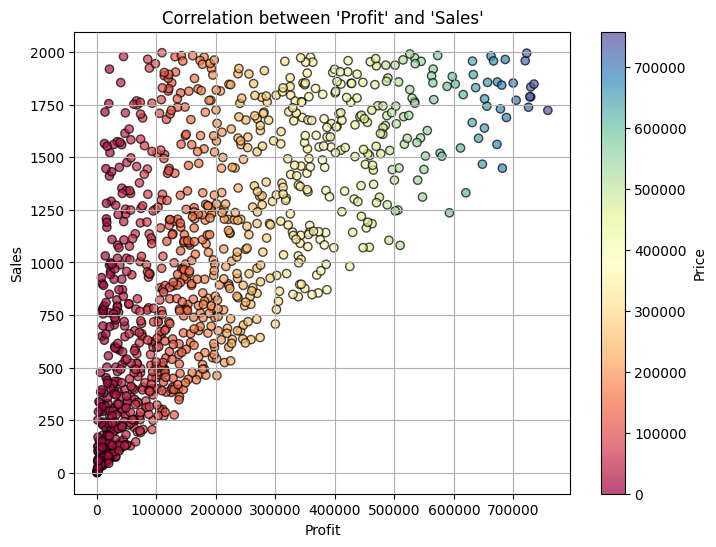

In [27]:
#Correlation between Price and Sales column
correlation = df['Profit'].corr(df['Sales'])
print(f"Correlation between {'Profit'} and {'Sales'}: {correlation}")

plt.figure(figsize=(8, 6))
cmap = cm.get_cmap('Spectral')  # Use 'Spectral' colormap for spectrum
plt.scatter(df['Profit'], df['Sales'], c=df['Profit'], cmap=cmap, edgecolors='black', alpha=0.7)  # Customize plot
plt.colorbar(label='Price')  # Add colorbar legend
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.title(f"Correlation between 'Profit' and 'Sales'")
plt.grid(True)
plt.show()

Correlation between Profit and Price: 0.6295477472860733


<ipython-input-28-dd51c6e1c01a>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')  # Use 'Spectral' colormap for spectrum


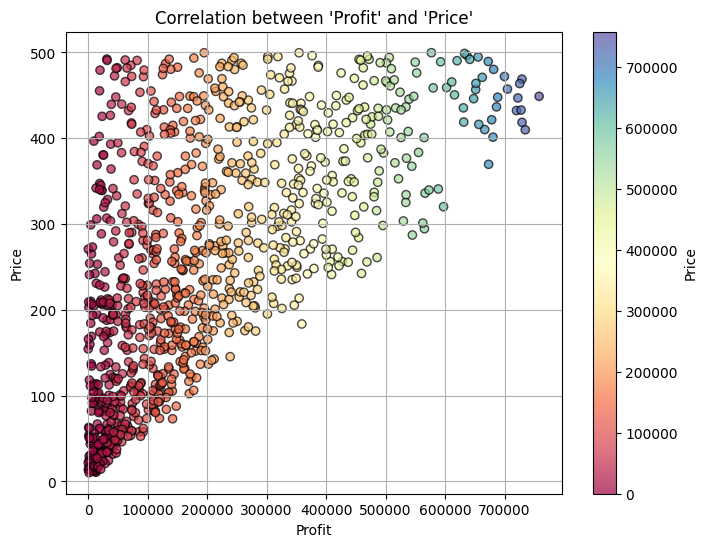

In [28]:
#Correlation between Price and Price column
correlation = df['Profit'].corr(df['Price'])
print(f"Correlation between {'Profit'} and {'Price'}: {correlation}")

plt.figure(figsize=(8, 6))
cmap = cm.get_cmap('Spectral')  # Use 'Spectral' colormap for spectrum
plt.scatter(df['Profit'], df['Price'], c=df['Profit'], cmap=cmap, edgecolors='black', alpha=0.7)  # Customize plot
plt.colorbar(label='Price')  # Add colorbar legend
plt.xlabel('Profit')
plt.ylabel('Price')
plt.title(f"Correlation between 'Profit' and 'Price'")
plt.grid(True)
plt.show()

In [29]:
#Showing best Profit based on category
Category_group = df.groupby('Category')[['Sales','Profit']].sum()
sort_category_group = Category_group.sort_values(by=['Profit'], ascending=False)
print(sort_category_group)

                            Sales      Profit
Category                                     
Bedsheets                   46631  9641772.00
Socks                       41812  9053615.34
Bicycles                    42750  8989952.93
Cookware                    40268  8801743.37
Electronics                 42844  8626941.59
Motor vehicle parts         45116  8602812.00
Mobile phone accessories    43660  8516557.52
Books                       41215  8516017.41
Bath and body               42454  8455628.74
Skin care                   40889  8200543.90
Toys & Games                42295  8161696.94
Nail care                   41545  7951482.09
Coats and jackets           35640  7857578.51
Drinkware                   39870  7840910.80
Makeup                      42337  7664178.92
Clothing                    37672  7462886.40
Art and crafting materials  45912  7425158.15
Home & Kitchen              35777  7152532.09
Perfume and cologne         35940  6964310.86
Vitamins and supplements    44402 

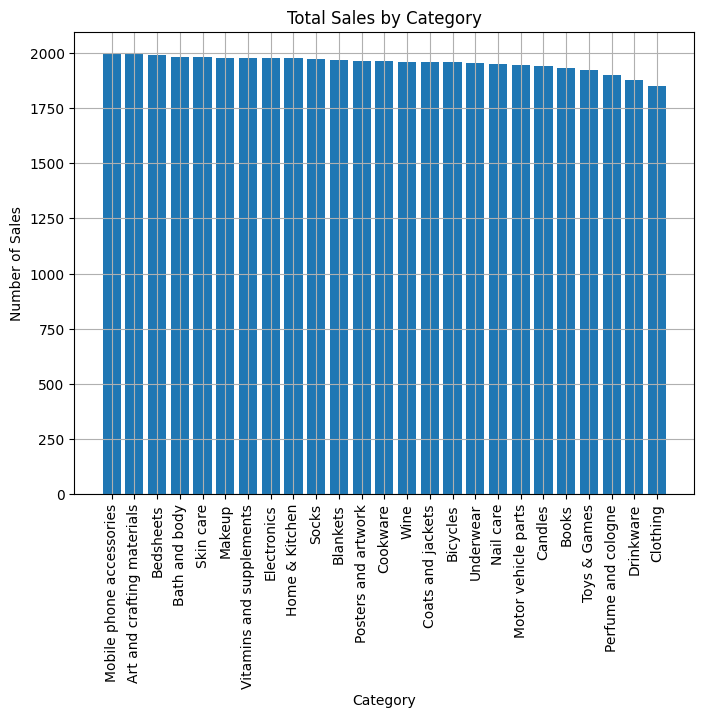

In [47]:
plt.figure(figsize=(8, 6))
df_sorted = df.sort_values(by='Sales', ascending=False)
plt.bar(df_sorted['Category'], df_sorted['Sales'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

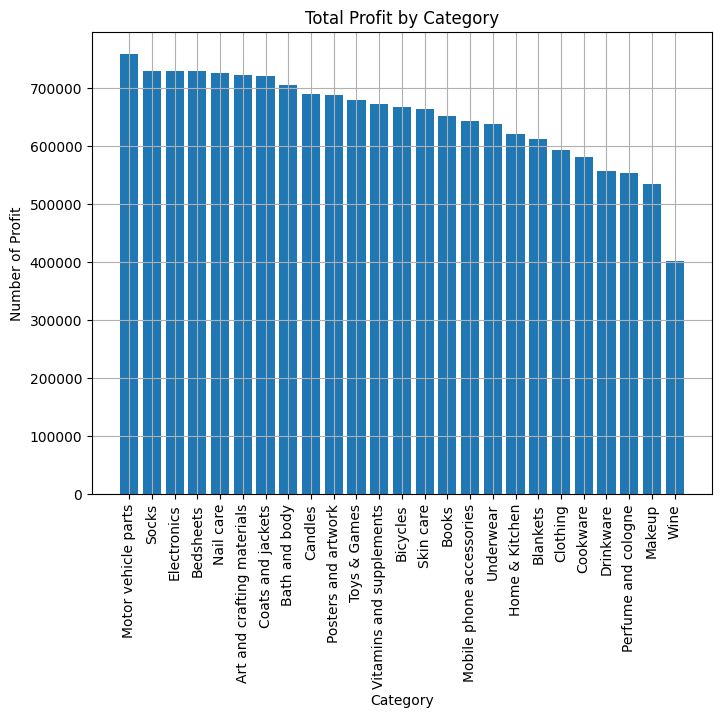

In [46]:
plt.figure(figsize=(8, 6))
df_sorted = df.sort_values(by='Profit', ascending=False)
plt.bar(df_sorted['Category'], df_sorted['Profit'])  # Use sorted data
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Number of Profit')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

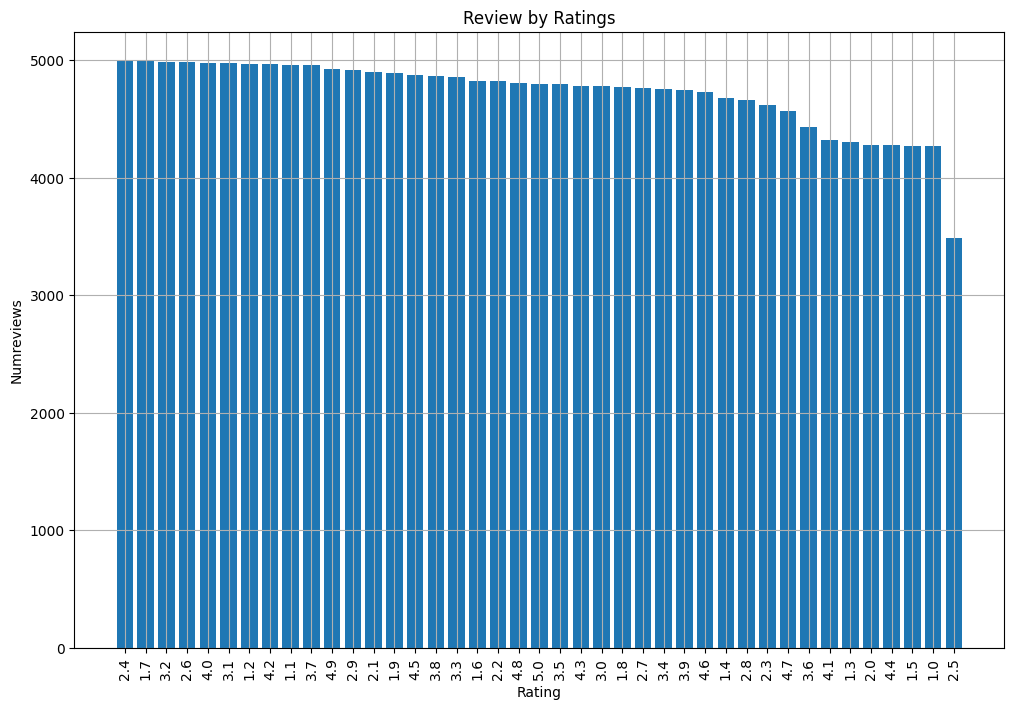

In [54]:
plt.figure(figsize=(12, 8))
df_sorted = df.sort_values(by='NumReviews', ascending=False)
plt.bar(df_sorted['Rating'],df_sorted['NumReviews'])
plt.title('Review by Ratings')
plt.xlabel('Rating')
plt.ylabel('Numreviews')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [33]:
#Showing best Profit based on prroductname per category
Profit_group = df.groupby(['Category','ProductName'])['Profit'].sum().sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(Profit_group)

Category                    ProductName     
Books                       Biography           4926934.01
Bicycles                    Mountain Bike       4195194.90
Socks                       Wool Socks          3574086.04
Skin care                   Cleanser            3547282.64
Drinkware                   Water Bottle        3503556.21
Coats and jackets           Denim Jacket        3454978.72
Nail care                   Nail Clippers       3335185.70
Mobile phone accessories    Earbuds             3216976.55
Perfume and cologne         Eau de Toilette     3106033.87
Motor vehicle parts         Spark Plugs         3039754.38
Vitamins and supplements    Vitamin D           3023215.86
Electronics                 Smartwatch          2904538.90
Mobile phone accessories    Phone Case          2843453.58
Blankets                    Throw Blanket       2825995.38
Makeup                      Foundation          2794550.67
Underwear                   Thongs              2766805.31
Bath and bo

In [48]:
Rating_group = df.groupby(['Category','Rating'])['NumReviews'].sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(Rating_group)

Category                    Rating
Art and crafting materials  1.1        8871
                            1.2        3496
                            1.3        2422
                            1.4        2587
                            1.7        3988
                            1.8        1884
                            2.1        3701
                            2.2        1999
                            2.4        7862
                            2.5         891
                            2.7        2224
                            2.9        6436
                            3.0         795
                            3.3        6951
                            3.4        1610
                            3.5        3735
                            3.6        3220
                            3.7        4888
                            3.8        2158
                            3.9        6333
                            4.0        2390
                            4.1        43

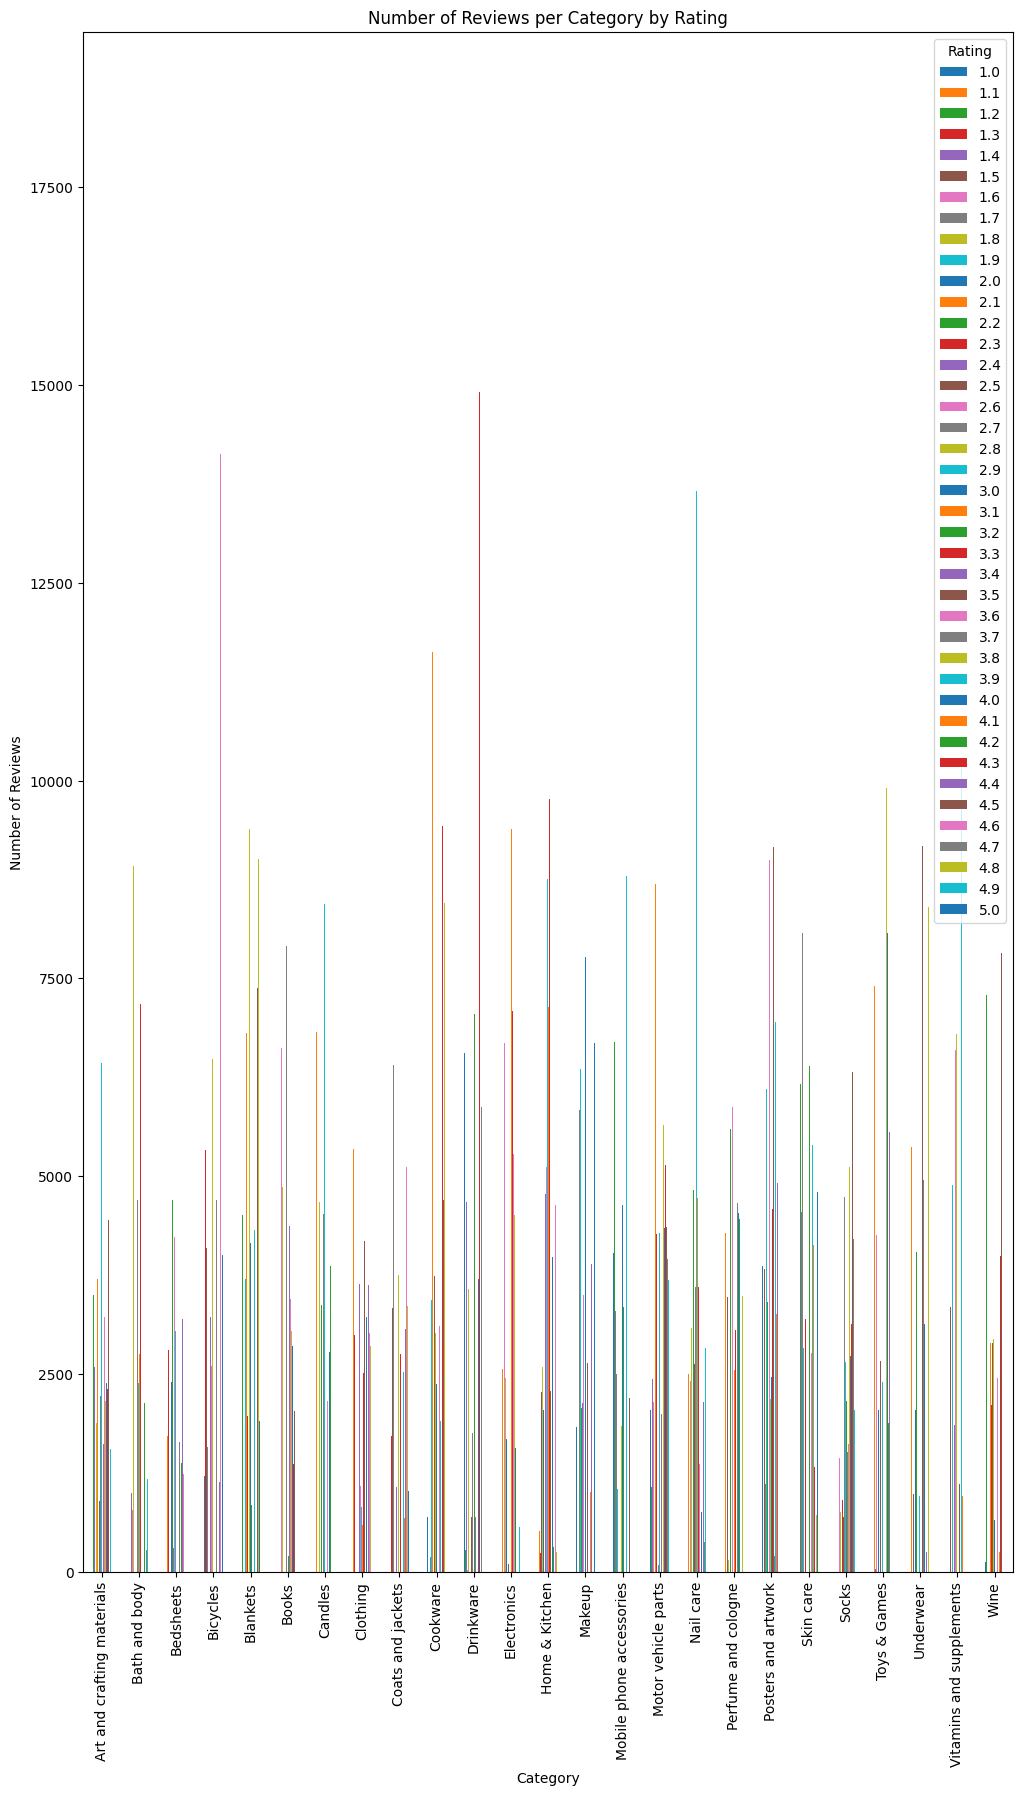

In [49]:
pivot_table = Rating_group.unstack(fill_value=0)

# Membuat stacked bar chart
pivot_table.plot(kind='bar', stacked=False, figsize=(12, 20))

plt.title('Number of Reviews per Category by Rating')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.legend(title='Rating')

plt.show()